In [1]:
import sys
from pathlib import Path
import os
import json

sys.path.append(str(Path.cwd().parent.parent))
print(str(Path.cwd().parent.parent))
print("Current working directory: ", os.getcwd())

from DataProcessing.DataAugmentation import ImageEnhancement
from ModelDevelopment.CentralPipeline import CentralPipeline
from ModelDevelopment.ImageBatchPipeline import ImageBatchPipeline
from DataProcessing.DataPreProcessing import DataPaths

import os
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

c:\Users\colin\OneDrive\Desktop\Jersey-Number-Recognition
Current working directory:  c:\Users\colin\OneDrive\Desktop\Jersey-Number-Recognition\ModelDevelopment\experiments


PRE-ENHANCE
(good) Width: 36, Height: 46
(bad) Width: 35, Height: 46
POST-ENHANCE
Width: 36, Height: 46
Width: 35, Height: 46


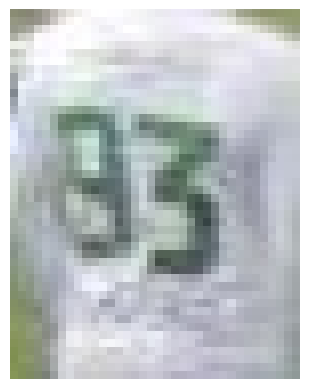

Resized bad image dimensions: (36, 46)


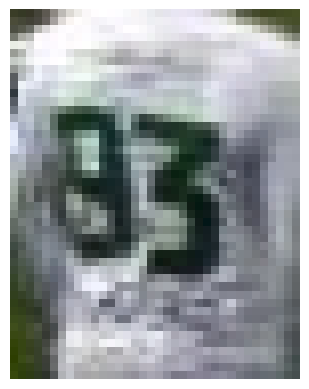

In [3]:
original_enhanced_path = r"C:\Users\colin\OneDrive\Desktop\Jersey-Number-Recognition\data\SoccerNet\jersey-2023\processed_data\test\1\crops_original_enhance"
no_enhance_path = r"C:\Users\colin\OneDrive\Desktop\Jersey-Number-Recognition\data\SoccerNet\jersey-2023\processed_data\test\1\crops_no_enhance"

bad_image = "1_15.jpg"
good_image = "1_14.jpg"
bad_image_path = os.path.join(original_enhanced_path, bad_image)
good_image_path = os.path.join(original_enhanced_path, good_image)

bad_image_path_no_enhance = os.path.join(no_enhance_path, bad_image)
good_image_path_no_enhance = os.path.join(no_enhance_path, good_image)

# Open the image file
img_good = Image.open(good_image_path)
img_bad = Image.open(bad_image_path)

img_good_no_enhance = Image.open(good_image_path_no_enhance)
img_bad_no_enhance = Image.open(bad_image_path_no_enhance)

width_good_no_enhance, height_good_no_enhance = img_good_no_enhance.size
width_bad_no_enhance, height_bad_no_enhance = img_bad_no_enhance.size

print("PRE-ENHANCE")
print(f"(good) Width: {width_good_no_enhance}, Height: {height_good_no_enhance}")
print(f"(bad) Width: {width_bad_no_enhance}, Height: {height_bad_no_enhance}")

# Get the dimensions of the image
width, height = img_good.size
print("POST-ENHANCE")
print(f"Width: {width}, Height: {height}")
width, height = img_bad.size
print(f"Width: {width}, Height: {height}")

# Bad image has a different size: width is 35 when it needs to be 36
# Solution: Resize the image to the correct size
# Resize the original image and then run the enhance again
# Resize the bad image to the correct size (based on the no-enhance good image dimensions)
# For the resizing, stretch the image rather than adding white around it
img_bad_now_good = img_bad_no_enhance.resize((width_good_no_enhance, height_good_no_enhance))

# Show the resized image before enhancement
plt.imshow(np.array(img_bad_now_good))
plt.axis('off')  # Hide the axes
plt.show()

print(f"Resized bad image dimensions: {img_bad_now_good.size}")

# Instantiate your enhancer once
enhancer = ImageEnhancement()

# Convert the resized PIL image to a tensor (values in [0, 1])
img_bad_tensor = enhancer.to_tensor(img_bad_now_good)

# Normalize the tensor (using the model’s mean and std)
img_bad_normalized = enhancer.normalize(img_bad_tensor)

# Now run the enhancement pipeline on the normalized tensor
normalized_tensor = enhancer.enhance_image(img_bad_normalized)

# To display the final enhanced image, first denormalize and convert back to a PIL image:
enhanced_image = enhancer.to_pil(enhancer.denormalize(normalized_tensor).clamp(0, 1))

plt.imshow(np.array(enhanced_image))
plt.axis('off')
plt.show()


c:\Users\colin\OneDrive\Desktop\Jersey-Number-Recognition
Current working directory:  c:\Users\colin\OneDrive\Desktop\Jersey-Number-Recognition\ModelDevelopment\experiments
PRE-ENHANCE
(good) Width: 36, Height: 46
(bad) Width: 35, Height: 46
POST-ENHANCE
Width: 36, Height: 46
Width: 35, Height: 46


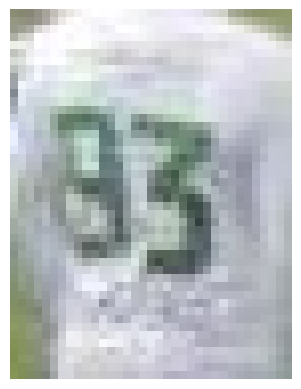

Resized bad image dimensions: (35, 46)


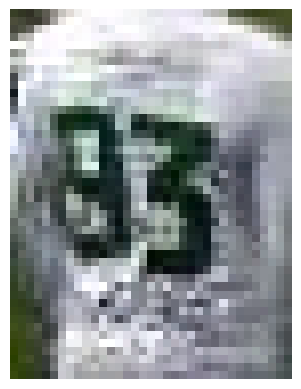

In [1]:
import sys
from pathlib import Path
import os
import json

sys.path.append(str(Path.cwd().parent.parent))
print(str(Path.cwd().parent.parent))
print("Current working directory: ", os.getcwd())

from DataProcessing.DataAugmentation import ImageEnhancement
from ModelDevelopment.CentralPipeline import CentralPipeline
from ModelDevelopment.ImageBatchPipeline import ImageBatchPipeline
from DataProcessing.DataPreProcessing import DataPaths

import os
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

original_enhanced_path = r"C:\Users\colin\OneDrive\Desktop\Jersey-Number-Recognition\data\SoccerNet\jersey-2023\processed_data\test\1\crops_original_enhance"
no_enhance_path = r"C:\Users\colin\OneDrive\Desktop\Jersey-Number-Recognition\data\SoccerNet\jersey-2023\processed_data\test\1\crops_no_enhance"

bad_image = "1_15.jpg"
good_image = "1_14.jpg"
bad_image_path = os.path.join(original_enhanced_path, bad_image)
good_image_path = os.path.join(original_enhanced_path, good_image)

bad_image_path_no_enhance = os.path.join(no_enhance_path, bad_image)
good_image_path_no_enhance = os.path.join(no_enhance_path, good_image)

# Open the image file
img_good = Image.open(good_image_path)
img_bad = Image.open(bad_image_path)

img_good_no_enhance = Image.open(good_image_path_no_enhance)
img_bad_no_enhance = Image.open(bad_image_path_no_enhance)

width_good_no_enhance, height_good_no_enhance = img_good_no_enhance.size
width_bad_no_enhance, height_bad_no_enhance = img_bad_no_enhance.size

print("PRE-ENHANCE")
print(f"(good) Width: {width_good_no_enhance}, Height: {height_good_no_enhance}")
print(f"(bad) Width: {width_bad_no_enhance}, Height: {height_bad_no_enhance}")

# Get the dimensions of the image
width, height = img_good.size
print("POST-ENHANCE")
print(f"Width: {width}, Height: {height}")
width, height = img_bad.size
print(f"Width: {width}, Height: {height}")

# Bad image has a different size: width is 35 when it needs to be 36
# Solution: Resize the image to the correct size
# Resize the original image and then run the enhance again
# Resize the bad image to the correct size (based on the no-enhance good image dimensions)
# For the resizing, stretch the image rather than adding white around it
img_bad_now_good = img_bad_no_enhance #.resize((width_good_no_enhance, height_good_no_enhance))

# Show the resized image before enhancement
plt.imshow(np.array(img_bad_now_good))
plt.axis('off')  # Hide the axes
plt.show()

print(f"Resized bad image dimensions: {img_bad_now_good.size}")

# Instantiate your enhancer once
enhancer = ImageEnhancement(use_unsharp=False)
img_bad_tensor = enhancer.to_tensor(img_bad_now_good)
img_bad_normalized = enhancer.normalize(img_bad_tensor)
normalized_tensor = enhancer.enhance_image(img_bad_normalized)
enhanced_image = enhancer.to_pil(enhancer.denormalize(normalized_tensor).clamp(0, 1))

enhancer_with_unsharp = ImageEnhancement(use_unsharp=True)
img_bad_tensor = enhancer_with_unsharp.to_tensor(img_bad_now_good)
img_bad_normalized = enhancer_with_unsharp.normalize(img_bad_tensor)
normalized_tensor = enhancer_with_unsharp.enhance_image(img_bad_normalized)
enhanced_image = enhancer.to_pil(enhancer.denormalize(normalized_tensor).clamp(0, 1))

plt.imshow(np.array(enhanced_image))
plt.axis('off')
plt.show()

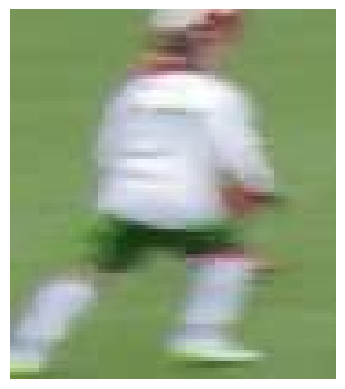

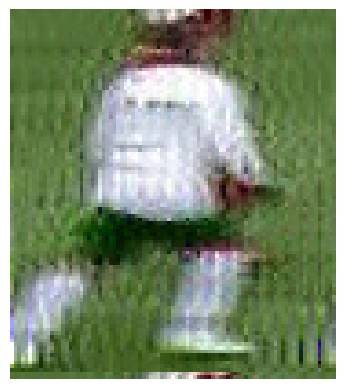

In [2]:
target_img = r"C:\Users\colin\OneDrive\Desktop\Jersey-Number-Recognition\data\SoccerNet\jersey-2023\extracted\test\images\327\327_130.jpg"

# Display the image
img = Image.open(target_img)
plt.imshow(np.array(img))
plt.axis('off')  # Hide the axes
plt.show()

enhancer = ImageEnhancement(use_unsharp=False)
img_tensor = enhancer.to_tensor(img)
img_normalized = enhancer.normalize(img_tensor)
normalized_tensor = enhancer.enhance_image(img_normalized)
enhanced_image = enhancer.to_pil(enhancer.denormalize(normalized_tensor).clamp(0, 1))

plt.imshow(np.array(enhanced_image))
plt.axis('off')
plt.show()